In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from time import time
import math
path_data1 = '/Users/SY/Desktop/obic/data/'#'D:/DATA/OBIC/'
path_data2 = 'C:/Users/1234/DATA/'
data_go = fits.open(path_data1 + 'gosss_2mass_new.fits')

In [2]:
start_time = time()
f = data_go[1].data


In [3]:
spt = list(f['STv3'])


In [4]:
# 分类(肉眼分类)
# 写成函数
def divid(s):
    # s is a string
    if 'N' in s or 'C' in s:
        new_s = s[2:]
    else:
        new_s = s[1:]
    if ':' in new_s:
        new_s = new_s[:-1]
    if '-' in new_s:
        new_s = new_s[:-2]
    f_s = float(new_s)
    print(f_s)
    return f_s
#    return round(f_s*2)/2 #round可能不可靠
#     return math.floor(f_s)

In [5]:
#math.floor(9.7)
for s in spt:
    f_s = divid(s)

9.7
9.0
9.0
7.0
9.7
9.5
9.0
7.0
7.0
8.0
5.0
8.0
7.5
8.0
7.5
7.5
4.0
9.5
8.0
9.2
5.0
7.0
6.5
7.0
5.5
9.0
6.0
8.0
7.5
8.0
9.5
9.5
8.0
9.7
7.5
9.0
3.5
7.0
5.0
9.0
9.7
4.5
6.0
9.5
6.5
5.5
5.0
9.7
8.5
6.0
7.0
9.0
9.7
4.5
4.0
5.5
6.0
5.0
6.5
6.0
4.5
6.5
6.0
6.0
8.5
7.0
8.0
8.0
7.0
7.0
7.5
9.2
7.5
9.7
8.5
8.5
8.0
4.0
5.0
4.0
8.0
8.0
9.5
7.0
7.5
5.5
6.5
7.5
6.0
6.5
9.7
9.5
7.0
7.0
7.0
6.5
7.0
6.5
9.2
9.7
7.5
7.0
7.0
8.0
9.5
7.0
7.5
5.5
6.5
5.5
8.0
3.5
8.5
7.0
6.5
6.5
9.2
9.7
9.0
9.7
7.0
5.0
7.5
9.5
6.0
7.0
9.2
9.5
9.0
9.5
8.0
6.0
8.5
7.5
9.5
8.5
9.7
8.0
8.0
6.0
9.0
5.5
9.2
7.5
9.7
5.5
7.5
8.0
3.0
6.0
9.5
9.5
8.0
8.0
9.7
7.5
7.0
7.0
6.5
8.5
3.0
8.0
6.0
6.0
4.5
8.5
4.5
7.0
6.5
6.0
9.7
5.5
7.5
9.7
9.7
5.5
6.0
8.0
7.0
8.0
6.5
8.0
6.5
9.2
9.0
9.7
9.0
8.0
7.0
8.5
9.0
8.5
9.0
9.5
8.0
8.0
8.5
9.5
7.5
9.7
9.7
9.2
6.5
7.5
9.5
8.5
9.2
9.5
8.0
6.0
9.2
7.5
9.7
8.5
9.7
8.5
9.7
6.5
8.0
5.5
5.0
8.5
4.5
8.5
8.0
9.0
6.0
8.5
9.0
9.5
4.5
4.0
4.5
9.5
6.5
3.5
9.0
6.5
8.5
9.0
7.0
8.0
9.7
9.7
9.7
9.0
9.5
6.0
9.0
9.2


In [6]:
#直接计算直方图的频数（算法有点粗暴）
new_spt = []
for s in spt:
    new_spt.append(divid(s))
    

figure_spt = np.array(new_spt) #散点
figure_spt_sort = np.sort(np.array([i for i in set(figure_spt)]))
count = []
for i in range(len(figure_spt_sort)):
    k = 0
    for ele in new_spt:
        if ele == figure_spt_sort[i]:
            k = k + 1
    count.append(k)
print(count)
print(len(figure_spt))

9.7
9.0
9.0
7.0
9.7
9.5
9.0
7.0
7.0
8.0
5.0
8.0
7.5
8.0
7.5
7.5
4.0
9.5
8.0
9.2
5.0
7.0
6.5
7.0
5.5
9.0
6.0
8.0
7.5
8.0
9.5
9.5
8.0
9.7
7.5
9.0
3.5
7.0
5.0
9.0
9.7
4.5
6.0
9.5
6.5
5.5
5.0
9.7
8.5
6.0
7.0
9.0
9.7
4.5
4.0
5.5
6.0
5.0
6.5
6.0
4.5
6.5
6.0
6.0
8.5
7.0
8.0
8.0
7.0
7.0
7.5
9.2
7.5
9.7
8.5
8.5
8.0
4.0
5.0
4.0
8.0
8.0
9.5
7.0
7.5
5.5
6.5
7.5
6.0
6.5
9.7
9.5
7.0
7.0
7.0
6.5
7.0
6.5
9.2
9.7
7.5
7.0
7.0
8.0
9.5
7.0
7.5
5.5
6.5
5.5
8.0
3.5
8.5
7.0
6.5
6.5
9.2
9.7
9.0
9.7
7.0
5.0
7.5
9.5
6.0
7.0
9.2
9.5
9.0
9.5
8.0
6.0
8.5
7.5
9.5
8.5
9.7
8.0
8.0
6.0
9.0
5.5
9.2
7.5
9.7
5.5
7.5
8.0
3.0
6.0
9.5
9.5
8.0
8.0
9.7
7.5
7.0
7.0
6.5
8.5
3.0
8.0
6.0
6.0
4.5
8.5
4.5
7.0
6.5
6.0
9.7
5.5
7.5
9.7
9.7
5.5
6.0
8.0
7.0
8.0
6.5
8.0
6.5
9.2
9.0
9.7
9.0
8.0
7.0
8.5
9.0
8.5
9.0
9.5
8.0
8.0
8.5
9.5
7.5
9.7
9.7
9.2
6.5
7.5
9.5
8.5
9.2
9.5
8.0
6.0
9.2
7.5
9.7
8.5
9.7
8.5
9.7
6.5
8.0
5.5
5.0
8.5
4.5
8.5
8.0
9.0
6.0
8.5
9.0
9.5
4.5
4.0
4.5
9.5
6.5
3.5
9.0
6.5
8.5
9.0
7.0
8.0
9.7
9.7
9.7
9.0
9.5
6.0
9.0
9.2


In [7]:
#give color(JH) or else in 2MASS
color_JH = f['Jmag']-f['Hmag']
[ra,dec] = [f['RAd'],f['decd']]

color_JH = color_JH[:, np.newaxis]
ra = ra[:, np.newaxis]
dec = dec[:, np.newaxis]
figure_spt = figure_spt[:, np.newaxis]
ra_dec=np.concatenate((ra,dec), axis = 1)
c_ra_dec=np.concatenate((color_JH,ra_dec), axis = 1)
c_ra_dec=np.concatenate((c_ra_dec,figure_spt), axis = 1)
c_ra_dec.shape

(589, 4)

In [8]:
#fit scatter

ic = []
ratio = 10
c_ra_dec_fin = np.array([0,0,0,0])
for i in range(len(figure_spt_sort)):
    bin_c = []
    for ele_num in range(len(spt)):
        if figure_spt[ele_num] == figure_spt_sort[i]:
            bin_c.append(c_ra_dec[ele_num,0])
    bin_c_ara = np.array(bin_c)
    #select the fit dot
    ratio_integer = math.ceil(len(bin_c)*ratio/100)
    sort = c_ra_dec[np.lexsort(c_ra_dec[:,::-1].T)] 
    #print(sort[:,0][:ratio_integer])
    a = np.median(sort[:,0][:ratio_integer])
    index = np.where(sort[:,0]<=np.max(sort[:,0][:ratio_integer]))
    #print(sort[index[0],:])
    c_ra_dec_final = sort[index[0],:]
    #print(c_ra_dec_final.shape)
    c_ra_dec_fin = np.vstack((c_ra_dec_fin,c_ra_dec_final))
    ic.append(float(a))
c_ra_dec_fin = c_ra_dec_fin[1:,:]
use_ic = np.array(ic)
use_spt = np.array(figure_spt_sort)
print(len(use_ic))
print(len(use_spt))
print(use_ic)
print(use_spt)
print(c_ra_dec_fin.shape)

18
18
[-2.82700014 -2.82700014 -2.82700014 -1.53200006 -1.53200006 -1.53200006
 -1.53200006 -1.53200006 -0.20299983 -0.16899967 -0.16499996 -0.16699982
 -0.16699982 -0.20299983 -0.16899967 -0.23699999 -0.16699982 -0.16499996]
[ 2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.
  9.2  9.5  9.7]
(66, 4)


In [9]:
whole_figure = np.vstack((use_spt , use_ic)).T
print(whole_figure)

[[ 2.         -2.82700014]
 [ 2.5        -2.82700014]
 [ 3.         -2.82700014]
 [ 3.5        -1.53200006]
 [ 4.         -1.53200006]
 [ 4.5        -1.53200006]
 [ 5.         -1.53200006]
 [ 5.5        -1.53200006]
 [ 6.         -0.20299983]
 [ 6.5        -0.16899967]
 [ 7.         -0.16499996]
 [ 7.5        -0.16699982]
 [ 8.         -0.16699982]
 [ 8.5        -0.20299983]
 [ 9.         -0.16899967]
 [ 9.2        -0.23699999]
 [ 9.5        -0.16699982]
 [ 9.7        -0.16499996]]


In [10]:
# SFD ratio

ratio_SFD = 5

# fitting curve


fc = np.polyfit(use_spt, use_ic, 3)#用3次多项式拟合
fitcurve = np.poly1d(fc)
# print(fitcurve) #在屏幕上打印拟合多项式

colorvals=fitcurve(use_spt)

# print(len(colorvals),len(int_teff))
#print(len(bin_tbl_final[teff].values))

# SFD_tbl_ratio[teff]

In [11]:
## use SFD dustmap
from __future__ import print_function
from astropy.coordinates import SkyCoord
from astropy import units as u
from dustmaps.sfd import SFDQuery

sfd = SFDQuery()

## ebv前的系数需要去文献中拿到。目前使用的是r和i的
# Const1 = 0.709 #J #3.303 #g #2.285 #r 
# Const2 = 0.449 #H #2.285 #r #1.698 #i

#time_start = time.time()
SFD_catalog_color = []
SFD_catalog_teff = []
lens = len(c_ra_dec_fin[:,0])

ebv_final = []

# 判断ebv < 0.05，就拿入下一个数组，最后一起画在图上
print(lens)
for i in range(lens):
    coords = SkyCoord(c_ra_dec_fin[i,1],c_ra_dec_fin[i,2],\
                      frame = 'icrs',unit = 'deg')
    ebv = sfd(coords)
    ebv_final.append(ebv)
    
#     A_c1 = Const1*ebv;
#     A_c2 = Const2*ebv;

    if ebv < 0.05:
        SFD_colorindex = c_ra_dec_fin[i,0]
        SFD_catalog_color.append(SFD_colorindex)
    
        SFD_catalog_teff.append(c_ra_dec_fin[i,3])
        print(i)
#     print(i)

#print(time.time() - time_start)
print(SFD_catalog_teff,SFD_catalog_color)

66
28
65
[9.5, 9.5] [-0.15399980545043945, -0.15399980545043945]


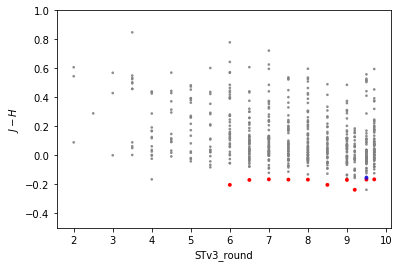

In [15]:
plt.scatter(figure_spt,color_JH ,c='grey', s=7, edgecolors='None', alpha=0.9)
plt.scatter(use_spt,use_ic, c='r', edgecolors='None', s=15)
plt.scatter(SFD_catalog_teff,SFD_catalog_color,alpha=0.5,edgecolors='None',c='b',s=15,label='SFD dustmap',zorder=2)
plt.xlabel('STv3_round') ; plt.ylabel('$J-H$')
plt.ylim(-0.5,1.0)
plt.savefig('2017_10_29_GOSSS.png', dpi=200)
plt.show()

In [78]:
a=np.array([1,2,3])
b=np.array([1,2,4])
a = a[:, np.newaxis]
b = b[:, np.newaxis]
v=np.concatenate((a.T,b.T), axis = 0)
v

array([[1, 2, 3],
       [1, 2, 4]])